In [ ]:
!git clone https://github.com/rachnadevraj/MLOps1.git

fatal: destination path 'MLOps1' already exists and is not an empty directory.


# 1. Dataset schema and storage

In [1]:
# Create the directory datasets
!mkdir datasets
import pandas as pd

In [2]:
# Download the zipped file from the google drive and store it in airline.zip
!gdown 1PKSwiZuBcGzSFE3ruHbbTlGCpJ0ruP9d -O datasets/airline.zip

Downloading...
From: https://drive.google.com/uc?id=1PKSwiZuBcGzSFE3ruHbbTlGCpJ0ruP9d
To: /content/datasets/airline.zip
100% 2.84M/2.84M [00:00<00:00, 200MB/s]


In [3]:
# Check the contents of datasets
!ls -al datasets/

total 2784
drwxr-xr-x 2 root root    4096 Dec 11 13:24 .
drwxr-xr-x 1 root root    4096 Dec 11 13:24 ..
-rw-r--r-- 1 root root 2841945 Dec  6 12:40 airline.zip


In [4]:
# Check the information about the file's type
!file datasets/airline.zip

datasets/airline.zip: Zip archive data, at least v4.5 to extract, compression method=deflate


In [5]:
# Unzip the airline.zip and retrive the train.csv and test.csv
!unzip datasets/airline.zip -d datasets/

Archive:  datasets/airline.zip
  inflating: datasets/test.csv       
  inflating: datasets/train.csv      


In [6]:
# Check the contents of datasets
!ls /content/datasets

airline.zip  test.csv  train.csv


In [7]:
# Read the CSV file into train_df
train_df = pd.read_csv("/content/datasets/train.csv")
train_df

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0                0   70172    Male     Loyal Customer   13  Personal Travel   
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
103899      103899   94171  Female  disloyal Customer   23  Business travel   
103900      103900   73097    Male     Loyal Customer   49  Business travel   
103901      103901   68825    Male  disloyal Customer   30  Business travel   
103902      103902   54173  Female  disloyal Customer   22  Business travel   
103903      103903   62567    Male     Loyal Customer   27  Business travel   

           Class  Flight Distance  Inflight wifi service  \
0       Eco Plus              460                      3   
1       Business              235                      3   
2       Business             1142                      2   
3       Business              562                      2   
4       Business              214                      3   
...          ...              ...                    ...   
103899       Eco              192                      2   
103900  Business             2347                      4   
103901  Business             1995                      1   
103902       Eco             1000                      1   
103903  Business             1723                      1   

        Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                       4  ...                       5   
1                                       2  ...                       1   
2                                       2  ...                       5   
3                                       5  ...                       2   
4                                       3  ...                       3   
...                                   ...  ...                     ...   
103899                                  1  ...                       2   
103900                                  4  ...                       5   
103901                                  1  ...                       4   
103902                                  1  ...                       1   
103903                                  3  ...                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      4                 3                 4                4   
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
103899                 3                 1                 4                2   
103900                 5                 5                 5                5   
103901                 3                 2                 4                5   
103902                 4                 5                 1                5   
103903                 1                 1                 4                4   

        Inflight service  Cleanliness  Departure Delay in Minutes  \
0                      5            5                          25   
1                      4            1                           1   
2                      4            5                           0   
3                      4            2                          11   
4                      3            3                           0   
...                  ...          ...                         

In [8]:
# Check the data types in the file
train_df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfaction                          object
dtype: object

In [9]:
# Remove rows with missing values in the specific column - Arrival Delay in Minutes.
train_df.dropna(subset=['Arrival Delay in Minutes'], inplace=True)

train_df

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0                0   70172    Male     Loyal Customer   13  Personal Travel   
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
103899      103899   94171  Female  disloyal Customer   23  Business travel   
103900      103900   73097    Male     Loyal Customer   49  Business travel   
103901      103901   68825    Male  disloyal Customer   30  Business travel   
103902      103902   54173  Female  disloyal Customer   22  Business travel   
103903      103903   62567    Male     Loyal Customer   27  Business travel   

           Class  Flight Distance  Inflight wifi service  \
0       Eco Plus              460                      3   
1       Business              235                      3   
2       Business             1142                      2   
3       Business              562                      2   
4       Business              214                      3   
...          ...              ...                    ...   
103899       Eco              192                      2   
103900  Business             2347                      4   
103901  Business             1995                      1   
103902       Eco             1000                      1   
103903  Business             1723                      1   

        Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                       4  ...                       5   
1                                       2  ...                       1   
2                                       2  ...                       5   
3                                       5  ...                       2   
4                                       3  ...                       3   
...                                   ...  ...                     ...   
103899                                  1  ...                       2   
103900                                  4  ...                       5   
103901                                  1  ...                       4   
103902                                  1  ...                       1   
103903                                  3  ...                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      4                 3                 4                4   
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
103899                 3                 1                 4                2   
103900                 5                 5                 5                5   
103901                 3                 2                 4                5   
103902                 4                 5                 1                5   
103903                 1                 1                 4                4   

        Inflight service  Cleanliness  Departure Delay in Minutes  \
0                      5            5                          25   
1                      4            1                           1   
2                      4            5                           0   
3                      4            2                          11   
4                      3            3                           0   
...                  ...          ...                         

In [10]:
# Check the shape of the dataframe
train_df.shape

(103594, 25)

### Optimizing Data Types

In [11]:
dtypes = {
    "Unnamed: 0": "int16", # This is the serial number and takes upto 6 digits
    "id": "int16",  # This is the id and takes upto 6 digits
    "Gender": "category", # This is the gender, and takes male or female
    "Customer Type": "category", # This takes loyal customer/disloyal customer
    "Age": "int8", # This takes age values ranging from 7 to 85
    "Type of Travel": "category", # Personal Travel/Business Travel
    "Class": "category", # Eco/Eco Plus/Business
    "Flight Distance": "int16", # Distance of the flight max 4963
    "Inflight wifi service": "category", # Rating of the service 0 to 5
    "Departure/Arrival time convenient": "category", # Rating of the service 0 to 5
    "Ease of Online booking": "category", # Rating of the service 0 to 5
    "Gate location": "category", # Rating of the service 0 to 5
    "Food and drink": "category", # Rating of the service 0 to 5
    "Online boarding": "category",  # Rating of the service 0 to 5
    "Seat comfort": "category", # Rating of the service 0 to 5
    "Inflight entertainment": "category", # Rating of the service 0 to 5
    "On-board service": "category", # Rating of the service 0 to 5
    "Leg room service": "category", # Rating of the service 0 to 5
    "Baggage handling": "category", # Rating of the service 0 to 5
    "Checkin service": "category", # Rating of the service 0 to 5
    "Inflight service": "category", # Rating of the service 0 to 5
    "Cleanliness": "category", # Rating of the service 0 to 5
    "Departure Delay in Minutes": "int16", # Duration of delay in departure
    "Arrival Delay in Minutes": "int16", # Duration of delay in arrival
    "satisfaction" : "category" # Satisfaction measured as neutral or dissatisfied/satisfied
}

In [12]:
# Update the data types of the dataset to optimize them based on their contents
train_new_df = pd.read_csv("/content/datasets/train.csv") #, dtype = dtypes)

train_new_df.dropna(subset=['Arrival Delay in Minutes'], inplace=True)

train_new_df = train_new_df.astype(dtypes)

train_new_df.dtypes

Unnamed: 0                              int16
id                                      int16
Gender                               category
Customer Type                        category
Age                                      int8
Type of Travel                       category
Class                                category
Flight Distance                         int16
Inflight wifi service                category
Departure/Arrival time convenient    category
Ease of Online booking               category
Gate location                        category
Food and drink                       category
Online boarding                      category
Seat comfort                         category
Inflight entertainment               category
On-board service                     category
Leg room service                     category
Baggage handling                     category
Checkin service                      category
Inflight service                     category
Cleanliness                          category
Departure Delay in Minutes              int16
Arrival Delay in Minutes                int16
satisfaction                         category
dtype: object

### Creating Parquet format

In [13]:
# Convert the dataframe to a parquet format and store it in datasets
train_new_df.to_parquet("/content/datasets/train.parquet")

In [14]:
# Check if the parquet format is stored as expected
!ls -alh datasets/

total 20M
drwxr-xr-x 2 root root 4.0K Dec 11 13:24 .
drwxr-xr-x 1 root root 4.0K Dec 11 13:24 ..
-rw-r--r-- 1 root root 2.8M Dec  6 12:40 airline.zip
-rw-r--r-- 1 root root 2.9M Feb 20  2020 test.csv
-rw-r--r-- 1 root root  12M Feb 20  2020 train.csv
-rw-r--r-- 1 root root 2.6M Dec 11 13:24 train.parquet


# 2. Profiling the dataset

In [ ]:
# Install the ydata_profiling library
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 82.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=d20a8fe0528bf0183ee01447f8c72078861faccb781de11161edd190be72d78e
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
# Import Profile Report
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(train_new_df, title="Airline Experience Profiling Report")


In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 3. Train - Test Split

### Feature set selection

In [15]:
train_new_df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [16]:
x_features = ['Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

cat_vars = ['Gender', 'Customer Type', 'Type of Travel',
       'Class', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

num_vars = list(set(x_features) - set(cat_vars))

num_vars

['Arrival Delay in Minutes',
 'Flight Distance',
 'Age',
 'Departure Delay in Minutes']

In [17]:
train_new_df[x_features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 0 to 103903
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103594 non-null  category
 1   Customer Type                      103594 non-null  category
 2   Age                                103594 non-null  int8    
 3   Type of Travel                     103594 non-null  category
 4   Class                              103594 non-null  category
 5   Flight Distance                    103594 non-null  int16   
 6   Inflight wifi service              103594 non-null  category
 7   Departure/Arrival time convenient  103594 non-null  category
 8   Ease of Online booking             103594 non-null  category
 9   Gate location                      103594 non-null  category
 10  Food and drink                     103594 non-null  category
 11  Online boarding                

### Data Transformation

1. One Hot Encoding for Categorical Data
2. Scaling for Numeric Data

In [18]:
x = train_new_df[x_features]
y = train_new_df['satisfaction']

#train_new_df['Arrival Delay in Minutes']

### Data Splitting

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 60)

In [21]:
x_train.shape

(82875, 22)

In [22]:
x_test.shape

(20719, 22)

### Encoding Categorical Variables

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
ohe_encoder = OneHotEncoder(handle_unknown='ignore')

### Scaling Numerical Values

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

### Creating Pipelines

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [27]:
non_imputed_num_transformer = Pipeline( steps = [('scaler', scaler)])
cat_transformer = Pipeline( steps = [('ohencoder', ohe_encoder)])

In [28]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num_not_imputed', non_imputed_num_transformer, num_vars),
        ('catvars', cat_transformer, cat_vars)])

### KNN (K Nearest Neighbor)

In [29]:
from sklearn.neighbors import KNeighborsRegressor

In [30]:
#knn = KNeighborsRegressor(n_neighbors=20)
knn = KNeighborsRegressor(n_neighbors=20, weights='distance')

In [31]:
knn_v1 = Pipeline(steps=[('preprocessor', preprocessor),
                          ('knn', knn)])

In [32]:
# Assuming 'satisfied' is represented by 1 and other values by 0:
y_train = y_train.map({'satisfied': 1, 'neutral or dissatisfied': 0}).astype(int)
y_test = y_test.map({'satisfied': 1, 'neutral or dissatisfied': 0}).astype(int)


In [33]:
knn_v1.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_not_imputed',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Arrival Delay in Minutes',
                                                   'Flight Distance', 'Age',
                                                   'Departure Delay in '
                                                   'Minutes']),
                                                 ('catvars',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel', 'Class',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness'])])),
                ('knn',
                 KNeighborsRegressor(n_neighbors=20, weights='distance'))])

In [34]:
from sklearn import set_config
set_config(display='diagram')

In [35]:
knn_v1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_not_imputed',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Arrival Delay in Minutes',
                                                   'Flight Distance', 'Age',
                                                   'Departure Delay in '
                                                   'Minutes']),
                                                 ('catvars',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel', 'Class',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness'])])),
                ('knn',
                 KNeighborsRegressor(n_neighbors=20, weights='distance'))])

In [36]:
## Predict on test set
y_pred = knn_v1.predict(x_test)

###K Fold Cross Validation

In [37]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score( knn_v1,
                          x_train,
                          y_train,
                          cv = 10,
                          scoring = 'r2')

In [ ]:
scores

In [ ]:
scores.mean()

In [ ]:
scores.std()

## W & B Initiation

In [ ]:
!pip install wandb

In [ ]:
import wandb
import os
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
os.environ["WANDB_API_KEY"] = "2dd7cb2aa4dead52f2776ea6e5f391577474bbdb"

### Linear Regression

In [46]:
linear_reg = LinearRegression()

linear_model = Pipeline(steps=[('preprocessor', preprocessor),
                               ('linear_model', linear_reg)])
## Pipeline for the applying imputation and then scaling

linear_model.fit(x_train, y_train)

wandb.init(project='mlops_airlinesatisfaction', config=None, tags = ['Linear Model - New', 'baseline', 'OHE Encoding'])
wandb.run.name = "LinearModel - New"
rmse = np.sqrt(mean_squared_error(y_test, linear_model.predict(x_test)))
r2 = linear_model.score(x_test, y_test)

wandb.log( {"rmse" : rmse,
            "r2": r2} )

wandb.Artifact("LinearModel",
               type = 'model',
               description = None)

wandb.save()
wandb.finish()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: rachna-devraj (rachna-devraj-indian-school-of-business). Use `wandb login --relogin` to force relogin


wandb: WARNING Calling wandb.run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


### Decision Tree

In [47]:
params = {"max_depth": 10}

dtree = DecisionTreeRegressor(**params)

dtree_model = Pipeline(steps=[('preprocessor', preprocessor),
                               ('dt_model', dtree)])


dtree_model.fit(x_train, y_train)

wandb.init(project='mlops_airlinesatisfaction', config=params, tags = ['Decision Tree - Final',
                                                           'OHE Encoding'])
wandb.run.name = "DecisionTree"
rmse = np.sqrt(mean_squared_error(y_test, dtree_model.predict(x_test)))
r2 = dtree_model.score(x_test, y_test)

wandb.log( {"rmse" : rmse,
            "r2": r2} )

wandb.Artifact("DecisionTree",
               type = 'model',
               description = params)

wandb.save()
wandb.finish()

### Manual Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = { "dt_model__max_depth" : range(5, 10)}

In [ ]:
dtree = DecisionTreeRegressor()

dtree_model = Pipeline(steps=[('preprocessor', preprocessor),
                               ('dt_model', dtree)])

In [ ]:
dt_grid = GridSearchCV(dtree_model,
                       param_grid = params,
                       cv = 10,
                       scoring = 'r2')

In [ ]:
dt_grid.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_not_imputed',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Departure '
                                                                          'Delay '
                                                                          'in '
                                                                          'Minutes',
                                                                          'Age',
                                                                          'Flight '
                                                                          'Distance',
                                                                          'Arrival '
                                                                          'Delay '
                                                                          'in '
                                                                          'Minutes']),
                                                                        ('catvars',
                                                                         Pipeline(steps=[('ohencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Customer '...
                                                                          'convenient',
                                                                          'Ease '
                                                                          'of '
                                                                          'Online '
                                                                          'booking',
                                                                          'Gate '
                                                                          'location',
                                                                          'Food '
                                                                          'and '
                                                                          'drink',
                                                                          'Online '
                                                                          'boarding',
                                                                          'Seat '
                                                                          'comfort',
                                                                          'Inflight '
                                                                          'entertainment',
                                                                          'On-board '
                                                                          'service',
                                                                          'Leg '
                                                                          'room '
                                                                          'service',
                                                                          'Baggage '
                                                                          'handling',
                                                                          'Checkin '
                                                                          'service',
                                                                          'Inflight '
              

In [ ]:
dt_grid.best_params_

{'dt_model__max_depth': 9}

In [ ]:
dt_grid.best_score_

0.8112894763304087

In [ ]:
pd.DataFrame(dt_grid.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.287813      0.487288         0.066386        0.030049   
1       1.431558      0.662597         0.104632        0.092256   
2       1.456829      0.283066         0.046765        0.012550   
3       1.238412      0.137487         0.035961        0.005268   
4       1.630026      0.238176         0.043758        0.020579   

   param_dt_model__max_depth                      params  split0_test_score  \
0                          5  {'dt_model__max_depth': 5}           0.698835   
1                          6  {'dt_model__max_depth': 6}           0.724696   
2                          7  {'dt_model__max_depth': 7}           0.760759   
3                          8  {'dt_model__max_depth': 8}           0.789346   
4                          9  {'dt_model__max_depth': 9}           0.801492   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.716765           0.707263           0.714198           0.705122   
1           0.739500           0.731142           0.738236           0.721286   
2           0.771662           0.764996           0.773007           0.760977   
3           0.800718           0.794402           0.801467           0.788903   
4           0.813759           0.805388           0.818034           0.808714   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0           0.704588           0.691453           0.714273           0.734643   
1           0.727403           0.712920           0.742190           0.759255   
2           0.760194           0.751261           0.778478           0.782779   
3           0.795041           0.789201           0.804826           0.812166   
4           0.810573           0.809819           0.822709           0.822091   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.701108         0.708825        0.011329                5  
1           0.722883         0.731951        0.012566                4  
2           0.759833         0.766394        0.009271                3  
3           0.792663         0.796873        0.007343                2  
4           0.800317         0.811289        0.007478                1

### Using Sweep Functions

In [ ]:
def train_decision_tree(config=None):
    # Initialize WandB
    with wandb.init(config=config):
        config = wandb.config

        dtree = DecisionTreeRegressor(max_depth=config.max_depth)

        dtree_model = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('dt_model', dtree)])
        dtree_model.fit(x_train, y_train)

        # Evaluate the model
        rmse = np.sqrt(mean_squared_error(y_test, dtree_model.predict(x_test)))
        r2 = dtree_model.score(x_test, y_test)

        # Log metrics to WandB
        wandb.log( {"rmse" : rmse,
                    "r2": r2,
                    "max_depth": config.max_depth} )

In [ ]:
sweep_config = {
    "method": "grid",
    "metric": {"name": "r2", "goal": "maximize"},
    "parameters": {
        "max_depth": {
            "values": [4, 6, 8, 12]  # Depths to evaluate
        },
    },
}

In [ ]:
sweep_id = wandb.sweep(sweep_config, project="mlops_airlinesatisfaction")

Create sweep with ID: 4w5711r6
Sweep URL: https://wandb.ai/rachna-devraj-indian-school-of-business/mlops_airlinesatisfaction/sweeps/4w5711r6


In [ ]:
wandb.agent(sweep_id,
            function=train_decision_tree)  # Run all experiments

wandb: Agent Starting Run: f8flv8cs with config:
wandb: 	max_depth: 4


wandb: Agent Starting Run: 8ym2vgp2 with config:
wandb: 	max_depth: 6


wandb: Agent Starting Run: z98whwim with config:
wandb: 	max_depth: 8


wandb: Agent Starting Run: khv7lj6t with config:
wandb: 	max_depth: 12


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


### Get Experiment Details

In [ ]:
api = wandb.Api()

all_runs = api.runs("rachna-devraj-indian-school-of-business/mlops_airlinesatisfaction", order="+summary_metrics.rmse")

for run in all_runs:
  print(f"Model Name: {run.name} and R2 {run.summary.get('r2')}")
  print(run.config)

Model Name: unique-sweep-4 and R2 0.8415114384741504
{'max_depth': 12}
Model Name: DecisionTree and R2 0.82761350115201
{'max_depth': 10}
Model Name: DecisionTree and R2 0.8268572315666581
{'max_depth': 10}
Model Name: winter-sweep-3 and R2 0.7954747104611594
{'max_depth': 8}
Model Name: comfy-sweep-3 and R2 0.7953014753406507
{'max_depth': 8}
Model Name: whole-sweep-2 and R2 0.7306127182594144
{'max_depth': 6}
Model Name: ethereal-sweep-2 and R2 0.7306127182594144
{'max_depth': 6}
Model Name: LinearModel and R2 0.7132693542586106
{}
Model Name: LinearModel and R2 0.7132692938675289
{}
Model Name: hardy-sweep-1 and R2 0.6606996787206357
{'max_depth': 4}
Model Name: hardy-sweep-1 and R2 0.6606996787206357
{'max_depth': 4}
Model Name: sunny-feather-9 and R2 None
{}
Model Name: summer-meadow-8 and R2 None
{}
Model Name: honest-universe-11 and R2 None
{}
Model Name: good-plant-10 and R2 None
{}
Model Name: FinalModel and R2 None
{'max_depth': 12}
Model Name: LinearModel and R2 None
{}


### Storing the model into a file

In [57]:
from joblib import dump

MODEL_DIR = "./airlinemodel"

#os.mkdir(MODEL_DIR)
dump(linear_model, MODEL_DIR + "/" + 'airline.pkl')
#dump(DecisionTree, MODEL_DIR + "/" + 'airline.pkl')

['./airlinemodel/airline.pkl']

###Logging the model artifact in the tracking tools (W & B)

In [48]:
wandb.init(project='mlops_airlinesatisfaction',
           config=None,
           tags = ['Final Model'])
wandb.run.name = "FinalModel"

In [ ]:
model_artifact = wandb.Artifact("DecisionTree_AirlineSatisfaction",
                                type = 'model',
                                description = 'DecisionTree for Airline Satisfaction prediction')

In [ ]:
model_artifact.add_dir(MODEL_DIR)

wandb: Adding directory to artifact (./airlinemodel)... Done. 0.0s


In [ ]:
wandb.run.log_artifact(model_artifact)

<Artifact Linear_Model_AirlineSatisfaction>

In [ ]:
wandb.save()
wandb.finish()

In [ ]:
import sklearn
sklearn.__version__

'1.5.2'

### Finding the Best Model Using AutoML

In [ ]:
# Installing H2O dependencies
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [ ]:
# Installing H2O
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.6-py2.py3-none-any.whl size=265859786 sha256=f449b0e82e1fa355142f9e6c886c38b1d9843126d9c0ecbfdcae84e42faf1f00
  Stored in directory: /root/.cache/pip/wheels/0c/95/eb/b449c73f478dbc4557b80170cf7f2aa6db15862877e9a63536
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
## prepare data

XCap = train_new_df[x_features]
XCap['satisfaction'] = train_new_df['satisfaction']

<ipython-input-92-7c1340bee4c1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XCap['satisfaction'] = train_new_df['satisfaction']


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(XCap,train_size = 0.8,random_state = 100)

In [ ]:
h2o.init()

h2o_train = h2o.H2OFrame(train)
h2o_test = h2o.H2OFrame(test)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.25" 2024-10-15; OpenJDK Runtime Environment (build 11.0.25+9-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.25+9-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp55__6gr2
  JVM stdout: /tmp/tmp55__6gr2/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp55__6gr2/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.6
H2O_cluster_version_age:    1 month and 8 days
H2O_cluster_name:           H2O_from_python_unknownUser_kydq59
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
aml = H2OAutoML(max_models=10,
                seed=1,
                stopping_metric='MSE',
                sort_metric='MSE',
                max_runtime_secs = 300,
                exclude_algos = ["GLM", "DeepLearning"])

aml.train(x=x_features,
          y='satisfaction',
          training_frame=h2o_train)
#XRT - Extremely Randomized Trees

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20241210_122104


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  --------
Stacking strategy                     blending
Number of base models (used / total)  3/4
# GBM base models (used / total)      1/1
# XGBoost base models (used / total)  1/1
# DRF base models (used / total)      1/2
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    AUTO
Metalearner nfolds                    0
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.011203067620366734
RMSE: 0.10584454459426208
LogLoss: 0.04303958817584899
AUC: 0.9993203623832199
AUCPR: 0.9991431009183617
Gini: 0.9986407247664397
Null degrees of freedom: 9973
Residual degrees of freedom: 9970
Null deviance: 13637.460938152757
Residual deviance: 858.5537049318357
AIC: 866.5537049318357

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4568644367234056
                         neutral or dissatisfied    satisfied    Error    Rate
-----------------------  -------------------------  -----------  -------  --------------
neutral or dissatisfied  5621                       54           0.0095   (54.0/5675.0)
satisfied                67                         4232         0.0156   (67.0/4299.0)
Total                    5688                       4286         0.0121   (121.0/9974.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.456864     0.985906  179
max f2                       0.309931     0.988482  223
max f0point5                 0.621082     0.990115  140
max accuracy                 0.456864     0.987868  179
max precision                0.999979     1         0
max recall                   0.0577396    1         334
max specificity              0.999979     1         0
max absolute_mcc             0.456864     0.975261  179
max min_per_class_accuracy   0.413346     0.985727  191
max mean_per_class_accuracy  0.456864     0.98745   179
max tns                      0.999979     5675      0
max fns                      0.999979     2362      0
max fps                      2.82303e-05  5675      399
max tps                      0.0577396    4299      334
max tnr                      0.999979     1         0
max fnr                      0.999979     0.54943   0
max fpr                      2.82303e-05  1         399
max tpr                      0.0577396    1         334

Gains/Lift Table: Avg response rate: 43.10 %, avg score: 43.62 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100261                   0.999996           2.32007     2.32007            1                0.999997     1                           0.999997            0.0232612       0.0232612                  132.007   132.007            0.0232612
2        0.0200521                   0.999995           2.32007     2.32007            1                0.999996     1                           0.999997            0.0232612       0.0465224                  132.007   132.007            0.0465224
3        0.0300782                   0.999995           2.32007     2.32007            1                0.999995     1                           0.999996            0.0232612     

In [ ]:
# Get leaderboard with `extra_columns` = 'ALL'
lb = h2o.automl.get_leaderboard(aml, extra_columns = 'ALL')
lb

model_id                                                       mse       auc    logloss     aucpr    mean_per_class_error      rmse    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  ---------  --------  ---------  --------  ----------------------  --------  ------------------  -------------------------  ---------------
StackedEnsemble_BestOfFamily_1_AutoML_1_20241210_122104  0.0267707  0.995     0.0866498  0.994165               0.0390524  0.163617                8244                   0.094073  StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20241210_122104     0.0269563  0.994921  0.0869519  0.994056               0.0409293  0.164184               16516                   0.298183  StackedEnsemble
GBM_2_AutoML_1_20241210_122104                           0.0270638  0.994934  0.0882901  0.994042               0.0405429  0.164511               24339                   0.061592  GBM
GBM_1_AutoML_1_20241210_122104                           0.0275625  0.994699  0.0896938  0.993833               0.0399216  0.16602                30121                   0.054676  GBM
GBM_3_AutoML_1_20241210_122104                           0.027598   0.994688  0.0900452  0.993479               0.0405829  0.166127               17201                   0.043182  GBM
GBM_5_AutoML_1_20241210_122104                           0.0277805  0.994576  0.0915893  0.993458               0.0404837  0.166675               28515                   0.043496  GBM
GBM_4_AutoML_1_20241210_122104                           0.0285825  0.994302  0.0926598  0.993152               0.0428635  0.169064               18627                   0.041315  GBM
XGBoost_1_AutoML_1_20241210_122104                       0.0288602  0.994101  0.0946672  0.993156               0.0416323  0.169883               22955                   0.014163  XGBoost
XGBoost_3_AutoML_1_20241210_122104                       0.0290198  0.994026  0.0946012  0.992713               0.0428348  0.170352               43629                   0.014913  XGBoost
XGBoost_2_AutoML_1_20241210_122104                       0.0299388  0.993744  0.0966328  0.992717               0.0458281  0.173028               29471                   0.012563  XGBoost
[12 rows x 10 columns]

In [ ]:
model_ids = list(aml.leaderboard.as_data_frame()['model_id'])

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
model_ids

['StackedEnsemble_BestOfFamily_1_AutoML_1_20241210_122104',
 'StackedEnsemble_AllModels_1_AutoML_1_20241210_122104',
 'GBM_2_AutoML_1_20241210_122104',
 'GBM_1_AutoML_1_20241210_122104',
 'GBM_3_AutoML_1_20241210_122104',
 'GBM_5_AutoML_1_20241210_122104',
 'GBM_4_AutoML_1_20241210_122104',
 'XGBoost_1_AutoML_1_20241210_122104',
 'XGBoost_3_AutoML_1_20241210_122104',
 'XGBoost_2_AutoML_1_20241210_122104',
 'DRF_1_AutoML_1_20241210_122104',
 'XRT_1_AutoML_1_20241210_122104']

## XGB Model

In [ ]:
xgb_model = h2o.get_model('XGBoost_2_AutoML_1_20241210_122104')

In [ ]:
xgb_model

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_2_AutoML_1_20241210_122104


Model Summary: 
    number_of_trees
--  -----------------
    60

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.013100979288293528
RMSE: 0.11445950938342139
LogLoss: 0.04917346508691369
Mean Per-Class Error: 0.015579557528922072
AUC: 0.9990705458488562
AUCPR: 0.9988370458941365
Gini: 0.9981410916977125

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4194791167974472
                         neutral or dissatisfied    satisfied    Error    Rate
-----------------------  -------------------------  -----------  -------  ---------------
neutral or dissatisfied  32496                      421          0.0128   (421.0/32917.0)
satisfied                463                        24742        0.0184   (463.0/25205.0)
Total                    32959                      25163        0.0152   (884.0/58122.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.419479     0.982449  199
max f2                       0.293097     0.985831  235
max f0point5                 0.574052     0.987957  154
max accuracy                 0.419479     0.984791  199
max precision                0.999886     1         0
max recall                   0.019273     1         365
max specificity              0.999886     1         0
max absolute_mcc             0.419479     0.969031  199
max min_per_class_accuracy   0.390908     0.984249  207
max mean_per_class_accuracy  0.3984       0.984489  205
max tns                      0.999886     32917     0
max fns                      0.999886     20770     0
max fps                      0.00015648   32917     399
max tps                      0.019273     25205     365
max tnr                      0.999886     1         0
max fnr                      0.999886     0.824043  0
max fpr                      0.00015648   1         399
max tpr                      0.019273     1         365

Gains/Lift Table: Avg response rate: 43.37 %, avg score: 43.39 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010065                    0.999949           2.30597     2.30597            1                0.999963     1                           0.999963            0.0232097       0.0232097                  130.597   130.597            0.0232097
2        0.0200096                   0.999928           2.30597     2.30597            1                0.999938     1                           0.99995             0.022932        0.0461416                  130.597   130.597            0.0461416
3        0.0300231                   0.999907           2.30597     2.30597            1                0.999918     1                           0.999939            0.0230907       0.0692323                  130.597   130.597            0.0692323
4        0.0400193                   0.999889           2.30597     2.30597            1                0.999898     1                           0.999929            0.023051        0.0922833                  130.597   130.597            0.0922833
5        0.0500155                   0.999868           2.30597     2.30597            1                0.999878     1                           0.999919            0.023051        0.115334                   130.597   130.597            0.115334
6        0.100031                    0.999734           2.30597    

In [ ]:
xgb_model.actual_params

{'model_id': 'XGBoost_2_AutoML_1_20241210_122104',
 'training_frame': 'AutoML_1_20241210_122104_training_Key_Frame__upload_8fd0a2c1ad6897c86c9459d90a42457e.hex',
 'validation_frame': 'AutoML_1_20241210_122104_validation_Key_Frame__upload_8fd0a2c1ad6897c86c9459d90a42457e.hex',
 'nfolds': 0,
 'keep_cross_validation_models': False,
 'keep_cross_validation_predictions': False,
 'keep_cross_validation_fold_assignment': False,
 'score_each_iteration': False,
 'fold_assignment': None,
 'fold_column': None,
 'response_column': 'satisfaction',
 'ignored_columns': [],
 'ignore_const_cols': True,
 'offset_column': None,
 'weights_column': None,
 'stopping_rounds': 3,
 'stopping_metric': 'MSE',
 'stopping_tolerance': 0.0034736673714593743,
 'max_runtime_secs': 0.0,
 'seed': 3,
 'distribution': 'bernoulli',
 'tweedie_power': 1.5,
 'categorical_encoding': 'OneHotInternal',
 'quiet_mode': True,
 'checkpoint': None,
 'export_checkpoints_dir': None,
 'custom_metric_func': None,
 'ntrees': 60,
 'max_dep

In [ ]:
varimp = xgb_model.varimp()

In [ ]:
varimp_df = pd.DataFrame(varimp, columns = ['variable',
                                            'relative_importance',
                                            'scaled_importance',
                                            'percentage'])

varimp_df

variable  relative_importance  scaled_importance  \
0                     Online boarding         29942.548828           1.000000   
1               Inflight wifi service         15024.484375           0.501777   
2      Type of Travel.Business travel          9741.954102           0.325355   
3              Inflight entertainment          3526.961426           0.117791   
4                                 Age          2410.852539           0.080516   
5                     Checkin service          2313.706787           0.077272   
6                     Flight Distance          2281.407227           0.076193   
7              Ease of Online booking          2273.736084           0.075937   
8        Customer Type.Loyal Customer          2190.445068           0.073155   
9     Customer Type.disloyal Customer          2101.785156           0.070194   
10                     Class.Business          2042.701416           0.068221   
11     Type of Travel.Personal Travel          2021.360107           0.067508   
12                       Seat comfort          1926.638794           0.064345   
13                   Baggage handling          1890.402832           0.063134   
14                   Inflight service          1859.659424           0.062108   
15                   On-board service          1582.815186           0.052862   
16                   Leg room service          1274.248779           0.042556   
17                      Gate location          1261.106079           0.042118   
18                          Class.Eco           974.711731           0.032553   
19  Departure/Arrival time convenient           966.376831           0.032274   
20                        Cleanliness           919.046265           0.030694   
21           Arrival Delay in Minutes           822.367432           0.027465   
22         Departure Delay in Minutes           685.006165           0.022877   
23                     Food and drink           472.345032           0.015775   
24                     Class.Eco Plus           233.581375           0.007801   
25                      Gender.Female           219.864609           0.007343   
26                        Gender.Male            43.134438           0.001441   

    percentage  
0     0.329027  
1     0.165098  
2     0.107051  
3     0.038756  
4     0.026492  
5     0.025424  
6     0.025070  
7     0.024985  
8     0.024070  
9     0.023096  
10    0.022446  
11    0.022212  
12    0.021171  
13    0.020773  
14    0.020435  
15    0.017393  
16    0.014002  
17    0.013858  
18    0.010711  
19    0.010619  
20    0.010099  
21    0.009037  
22    0.007527  
23    0.005190  
24    0.002567  
25    0.002416  
26    0.000474

In [ ]:
varimp_df['cumsum'] = varimp_df.percentage.cumsum()
varimp_df[0:20]

variable  relative_importance  scaled_importance  \
0                     Online boarding         29942.548828           1.000000   
1               Inflight wifi service         15024.484375           0.501777   
2      Type of Travel.Business travel          9741.954102           0.325355   
3              Inflight entertainment          3526.961426           0.117791   
4                                 Age          2410.852539           0.080516   
5                     Checkin service          2313.706787           0.077272   
6                     Flight Distance          2281.407227           0.076193   
7              Ease of Online booking          2273.736084           0.075937   
8        Customer Type.Loyal Customer          2190.445068           0.073155   
9     Customer Type.disloyal Customer          2101.785156           0.070194   
10                     Class.Business          2042.701416           0.068221   
11     Type of Travel.Personal Travel          2021.360107           0.067508   
12                       Seat comfort          1926.638794           0.064345   
13                   Baggage handling          1890.402832           0.063134   
14                   Inflight service          1859.659424           0.062108   
15                   On-board service          1582.815186           0.052862   
16                   Leg room service          1274.248779           0.042556   
17                      Gate location          1261.106079           0.042118   
18                          Class.Eco           974.711731           0.032553   
19  Departure/Arrival time convenient           966.376831           0.032274   

    percentage    cumsum  
0     0.329027  0.329027  
1     0.165098  0.494126  
2     0.107051  0.601176  
3     0.038756  0.639933  
4     0.026492  0.666425  
5     0.025424  0.691849  
6     0.025070  0.716919  
7     0.024985  0.741904  
8     0.024070  0.765974  
9     0.023096  0.789069  
10    0.022446  0.811516  
11    0.022212  0.833728  
12    0.021171  0.854899  
13    0.020773  0.875672  
14    0.020435  0.896107  
15    0.017393  0.913500  
16    0.014002  0.927502  
17    0.013858  0.941360  
18    0.010711  0.952071  
19    0.010619  0.962690

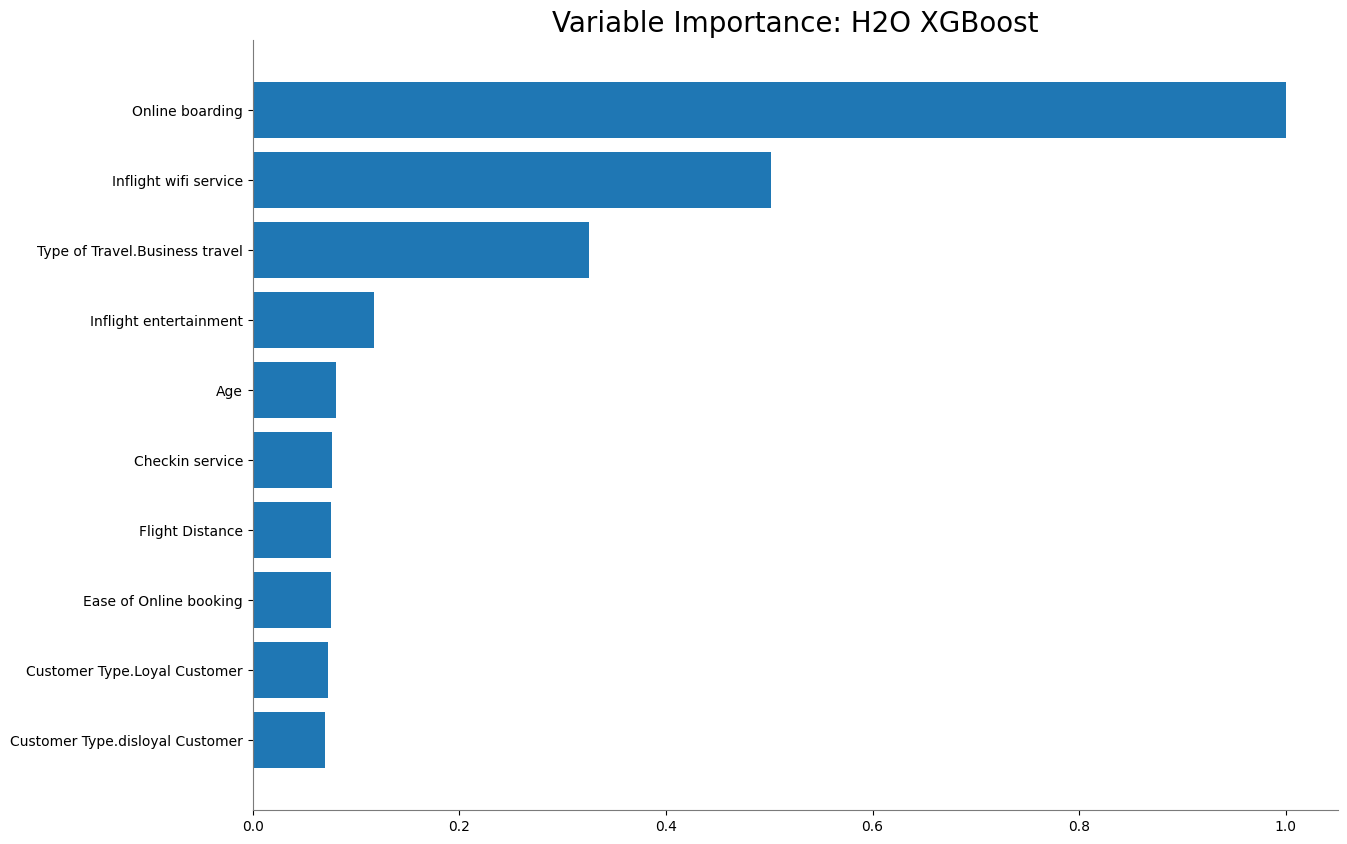

<Figure size 640x480 with 0 Axes>

In [ ]:
xgb_model.varimp_plot()

## Random Forest

In [ ]:
rf_model = h2o.get_model("DRF_1_AutoML_1_20241210_122104")

In [ ]:
rf_model.actual_params

{'model_id': 'DRF_1_AutoML_1_20241210_122104',
 'training_frame': 'AutoML_1_20241210_122104_training_Key_Frame__upload_8fd0a2c1ad6897c86c9459d90a42457e.hex',
 'validation_frame': 'AutoML_1_20241210_122104_validation_Key_Frame__upload_8fd0a2c1ad6897c86c9459d90a42457e.hex',
 'nfolds': 0,
 'keep_cross_validation_models': False,
 'keep_cross_validation_predictions': False,
 'keep_cross_validation_fold_assignment': False,
 'score_each_iteration': False,
 'score_tree_interval': 5,
 'fold_assignment': None,
 'fold_column': None,
 'response_column': 'satisfaction',
 'ignored_columns': [],
 'ignore_const_cols': True,
 'offset_column': None,
 'weights_column': None,
 'balance_classes': False,
 'class_sampling_factors': None,
 'max_after_balance_size': 5.0,
 'max_confusion_matrix_size': 20,
 'ntrees': 50,
 'max_depth': 20,
 'min_rows': 1.0,
 'nbins': 20,
 'nbins_top_level': 1024,
 'nbins_cats': 1024,
 'r2_stopping': 1.7976931348623157e+308,
 'stopping_rounds': 3,
 'stopping_metric': 'MSE',
 'stop

In [ ]:
# Get the "All Models" Stacked Ensemble model
stacked_model = h2o.get_model("StackedEnsemble_AllModels_1_AutoML_1_20241210_122104")

stacked_model

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20241210_122104


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  --------
Stacking strategy                     blending
Number of base models (used / total)  9/10
# GBM base models (used / total)      5/5
# XGBoost base models (used / total)  3/3
# DRF base models (used / total)      1/2
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    AUTO
Metalearner nfolds                    0
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.010217611408488637
RMSE: 0.10108220124477225
LogLoss: 0.04154593721466512
AUC: 0.9996048962846596
AUCPR: 0.999490116041988
Gini: 0.9992097925693193
Null degrees of freedom: 9973
Residual degrees of freedom: 9964
Null deviance: 13634.37107363854
Residual deviance: 828.7583555581397
AIC: 848.7583555581397

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.44251881601734167
                         neutral or dissatisfied    satisfied    Error    Rate
-----------------------  -------------------------  -----------  -------  -------------
neutral or dissatisfied  5633                       48           0.0084   (48.0/5681.0)
satisfied                40                         4253         0.0093   (40.0/4293.0)
Total                    5673                       4301         0.0088   (88.0/9974.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.442519     0.98976   188
max f2                       0.322316     0.991329  221
max f0point5                 0.528089     0.991617  166
max accuracy                 0.447495     0.991177  187
max precision                0.999887     1         0
max recall                   0.110543     1         300
max specificity              0.999887     1         0
max absolute_mcc             0.442519     0.982011  188
max min_per_class_accuracy   0.439897     0.990915  189
max mean_per_class_accuracy  0.442519     0.991117  188
max tns                      0.999887     5681      0
max fns                      0.999887     2899      0
max fps                      0.000119586  5681      399
max tps                      0.110543     4293      300
max tnr                      0.999887     1         0
max fnr                      0.999887     0.675285  0
max fpr                      0.000119586  1         399
max tpr                      0.110543     1         300

Gains/Lift Table: Avg response rate: 43.04 %, avg score: 43.39 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100261                   0.999956           2.32332   2.32332            1                0.999964     1                           0.999964            0.0232937       0.0232937                  132.332   132.332            0.0232937
2        0.0200521                   0.999946           2.32332   2.32332            1                0.999951     1                           0.999957            0.0232937       0.0465875                  132.332   132.332            0.0465875
3        0.0300782                   0.999937           2.32332   2.32332            1                0.999942     1                           0.999952            0.0232937       0.0698812    

In [ ]:
metalearner = h2o.get_model(stacked_model.metalearner()['name'])

metalearner

/usr/local/lib/python3.10/dist-packages/h2o/estimators/stackedensemble.py:965: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: metalearner_AUTO_StackedEnsemble_AllModels_1_AutoML_1_20241210_122104


GLM Model: summary
    family    link    regularization                                 lambda_search                                                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------------------------  ----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------------------------------------------------------------
    binomial  logit   Elastic Net (alpha = 0.5, lambda = 0.001762 )  nlambda = 100, lambda.max = 9.1874, lambda.min = 0.001762, lambda.1se = -1.0  10                            9                              153                     levelone_training_StackedEnsemble_AllModels_1_AutoML_1_20241210_122104

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.026094197824250858
RMSE: 0.16153698593279142
LogLoss: 0.0845651764953639
AUC: 0.9950924206945788
AUCPR: 0.9942724729760828
Gini: 0.9901848413891576
Null degrees of freedom: 16541
Residual degrees of freedom: 16532
Null deviance: 22660.15157489363
Residual deviance: 2797.754299172619
AIC: 2817.754299172619

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6121150289331442
                         neutral or dissatisfied    satisfied    Error    Rate
-----------------------  -------------------------  -----------  -------  ---------------
neutral or dissatisfied  9216                       114          0.0122   (114.0/9330.0)
satisfied                461                        6751         0.0639   (461.0/7212.0)
Total                    9677                       6865         0.0348   (575.0/16542.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.612115     0.959153  140
max f2                       0.171942     0.964082  285
max f0point5                 0.773894     0.976586  97
max accuracy                 0.612115     0.96524   140
max precision                0.999913     1         0
max recall                   0.00691737   1         381
max specificity              0.999913     1         0
max absolute_mcc             0.612115     0.929789  140
max min_per_class_accuracy   0.35577      0.958125  213
max mean_per_class_accuracy  0.564617     0.962081  151
max tns                      0.999913     9330      0
max fns                      0.999913     5679      0
max fps                      0.000143409  9330      399
max tps                      0.00691737   7212      381
max tnr                      0.999913     1         0
max fnr                      0.999913     0.787438  0
max fpr                      0.000143409  1         399
max tpr                      0.00691737   1         381

Gains/Lift Table: Avg response rate: 43.60 %, avg score: 43.60 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100351                   0.999956           2.29368     2.29368            1                0.999966     1                           0.999966            0.0230172       0.0230172                  129.368   129.368            0.0230172
2        0.0200097                   0.999946           2.29368     2.2

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
from sklearn import metrics

In [56]:
params = {"max_depth": 8}

#dtree = DecisionTreeRegressor(**params)
random_forest = RandomForestClassifier(**params)

#dtree_model = Pipeline(steps=[('preprocessor', preprocessor),
 #                              ('dt_model', dtree)])

random_forest_model = Pipeline(steps=[('preprocessor', preprocessor),
                               ('rf_model', random_forest)])

#dtree_model.fit(x_train, y_train)
random_forest_model.fit(x_train, y_train)


#wandb.init(project='mlops_airlinesatisfaction', config=params, tags = ['Decision Tree - Final',
#                                                           'OHE Encoding'])

wandb.init(project='mlops_airlinesatisfaction', config=params, tags = ['Random Forest',
                                                           'OHE Encoding'])

#wandb.run.name = "DecisionTree"
wandb.run.name = "RandomForest"

#rmse = np.sqrt(mean_squared_error(y_test, dtree_model.predict(x_test)))
#r2 = dtree_model.score(x_test, y_test)

rmse = np.sqrt(mean_squared_error(y_test, random_forest_model.predict(x_test)))
r2 = random_forest_model.score(x_test, y_test)
f1 = metrics.f1_score(y_test, random_forest_model.predict(x_test))

wandb.log( {"rmse" : rmse,
            "r2": r2,
            "f1": f1} )

#wandb.Artifact("DecisionTree",
wandb.Artifact("RandomForest",
               type = 'model',
               description = params)

print (metrics.confusion_matrix(y_test, random_forest_model.predict(x_test)))

wandb.save()
wandb.finish()

[[11155   490]
 [  798  8276]]


In [60]:
from joblib import dump

MODEL_DIR = "./airlinemodel"

os.mkdir(MODEL_DIR)
dump(random_forest_model, MODEL_DIR + "/" + 'airline.pkl')

['./airlinemodel/airline.pkl']

In [61]:
wandb.init(project='mlops_airlinesatisfaction',
           config=None,
           tags = ['Final Model - Random Forest'])
wandb.run.name = "FinalModel - RF"

In [62]:
model_artifact = wandb.Artifact("RandomForest_AirlineSatisfaction",
                                type = 'model',
                                description = 'Random Forest model for Airline Satisfaction prediction')

In [63]:
model_artifact.add_dir(MODEL_DIR)

wandb: Adding directory to artifact (./airlinemodel)... Done. 0.0s


In [64]:
wandb.run.log_artifact(model_artifact)

<Artifact RandomForest_AirlineSatisfaction>

In [65]:
wandb.save()
wandb.finish()